# Correlation analyzes of case/death rate with multiple variables in municipality level (admin2)


This Notebook read the collection of variables at state level collected in this week ([variables](Week3_variables_municipalities.ipynb), [population density](Week3_population_density_states.ipynb) and [comorbidities](Week3_comorbidities.ipynb)) and shows the correlation between those variables and the case/death rate through specific areas viewpoints.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

The collection of variables is read

In [2]:
dfVar=pd.read_csv('../data/week3_variables_municipalities.csv')
dfPopDens=pd.read_csv('../data/week3_population_density_municipalities.csv')
dfComorbidities=pd.read_csv('../data/week3_comorbidities_municipalities.csv')

In [3]:
dfVar.head()

,cve_ent,municipality,case_rate,case_rate_last_60_days,death_rate,death_rate_last_60_days,population,pct_disability,pct_limitation,pct_mental_problem,pct_no_problems,average_years_finish,pct_no_med_insurance,pct_med_insurance,average_household_size,pct_household_tics,pct_household_no_tics,pct_pop_0_14_years_old,pct_pop_15_64_years_old,pct_pop_65_more_years_old
0,1001,Aguascalientes,2294.857361,70.687761,222.770399,7.484586,961977,4.940347,12.131787,1.449619,80.812119,10.84,18.004485,80.497039,3.54,99.725989,0.274011,25.009226,66.481007,7.062643
1,1002,Asientos,912.236552,29.490406,70.776974,1.966027,50864,5.673954,8.947389,1.360491,85.929144,8.54,14.922145,86.351840,4.10,98.588742,1.411258,31.979396,62.753617,6.548836
2,1003,Calvillo,1616.194865,8.229098,42.791310,0.000000,60760,6.728111,11.125741,1.960171,77.080316,8.05,19.473338,76.316656,3.74,99.112312,0.887688,27.518104,59.009217,9.284068
3,1004,Cosio,768.412342,29.554321,70.930370,0.000000,16918,4.758246,11.425700,1.217638,83.733302,9.08,13.872798,86.600071,4.32,98.729997,1.270003,30.636009,63.240336,6.608346
4,1005,Jesus Maria,598.383826,16.131015,47.624900,0.768144,130184,3.868371,9.143981,1.261292,86.048209,10.22,20.969551,78.679408,3.91,99.554405,0.445595,29.422202,65.253026,5.022123


In [4]:
dfPopDens.head()

,Unnamed: 0,cve_ent,population/sqkm
0,0,1001,824.769043
1,1,1002,93.607672
2,2,1003,65.803308
3,3,1004,131.777013
4,4,1005,260.422641


In [5]:
dfComorbidities.head()

,cve_ent,municipality,pct_pop_obesity,pct_pop_hypertension,pct_pop_diabetes
0,1001,Aguascalientes,31.486541,14.942242,7.495861
1,1002,Asientos,32.282284,15.320425,7.953634
2,1003,Calvillo,40.004293,13.751906,9.172624
3,1004,Cosío,32.596450,16.431493,7.383116
4,1005,Jesús María,34.731715,12.356755,6.745819


All the variables are merged into one dataframe

In [6]:
dfAll = pd.merge(dfVar,dfPopDens,on=['cve_ent'])

In [7]:
dfAll = pd.merge(dfAll,dfComorbidities,on=['cve_ent'])

## Heatmap of health variables correlation with case/death rate 

All the variables related to health and the case/death rate are selected

In [8]:
dfHealth = dfAll[['case_rate', 'case_rate_last_60_days',
       'death_rate', 'death_rate_last_60_days',
       'pct_disability', 'pct_limitation', 'pct_mental_problem',
       'pct_no_problems', 'pct_pop_obesity', 'pct_pop_hypertension',
       'pct_pop_diabetes']].copy()

The correlation between the health and the case/death rate is as following

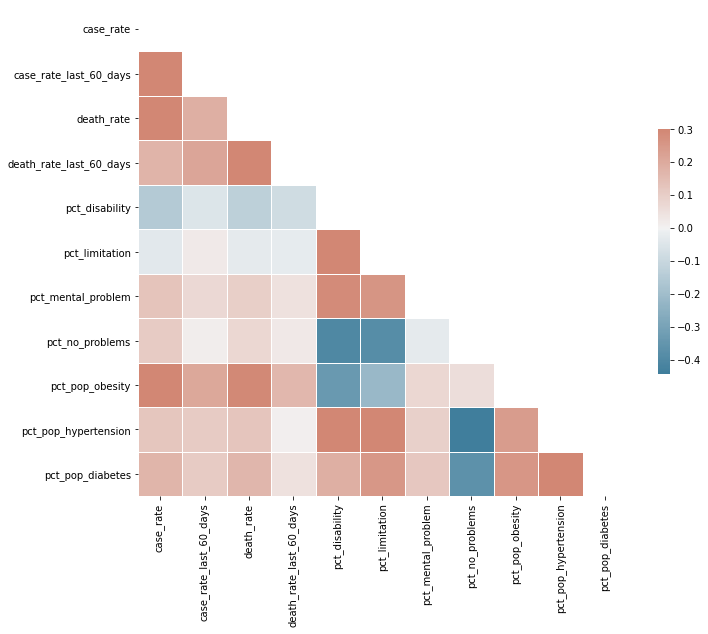

In [9]:
corr = dfHealth.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap = heatmap.get_figure()

As mention on the state health correlation people with mental problems, no health problems, comorbidities mostly obesity have a higher probability of contracting the virus and dying from it, the use of the municipality data reaffirms this because there is more data to correlate and the correlation is still positive.

## Heatmap of Socioeconomic and Education variables correlation with case/death rate

All the variables related to socioeconomic and education factors and the case/death rate are selected

In [10]:
dfSocioeconomicEducation = dfAll[['case_rate', 'case_rate_last_60_days',
       'death_rate', 'death_rate_last_60_days','pct_no_med_insurance',
       'pct_med_insurance','average_years_finish','average_household_size', 
       'pct_household_tics','pct_household_no_tics']].copy()

The correlation between the socioeconomic and education factors and the case/death rate is as following

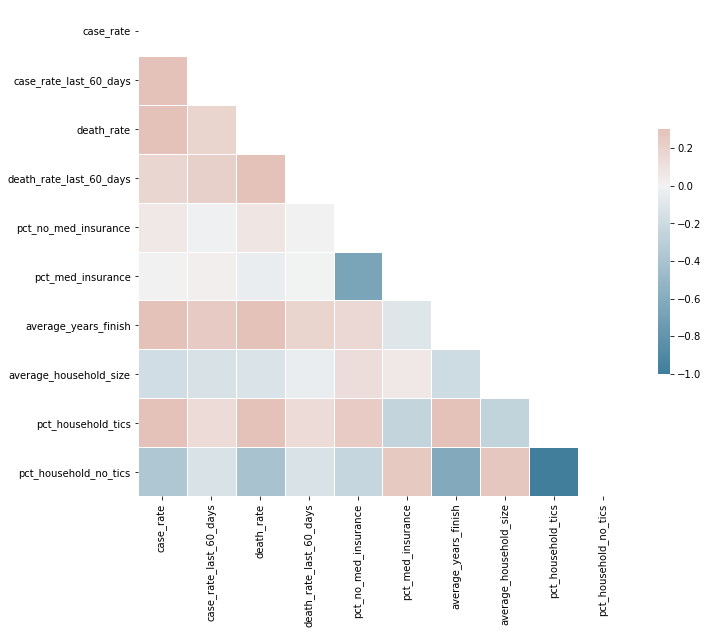

In [11]:
corr = dfSocioeconomicEducation.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap = heatmap.get_figure()

The same behaviour occurs in the municipality level as the state level where the people with medical insurance, househouseholds with TIC's and high level of education which are all on urban areas which are highly transited meaning they have a high probability of infection and in the case of people with no medical insurance and households wit no TIC's is viceversa because they are located on urban areas which have a low transit meaning they have a low probability of infection.

## Heatmap of population variables correlation with case/death rate

All the variables related to population factors and the case/death rate are selected

In [12]:
dfPopulation = dfAll[['case_rate','case_rate_last_60_days',
       'death_rate', 'death_rate_last_60_days',
       'population/sqkm']].copy()

The correlation between the population factors and the case/death rate is as following

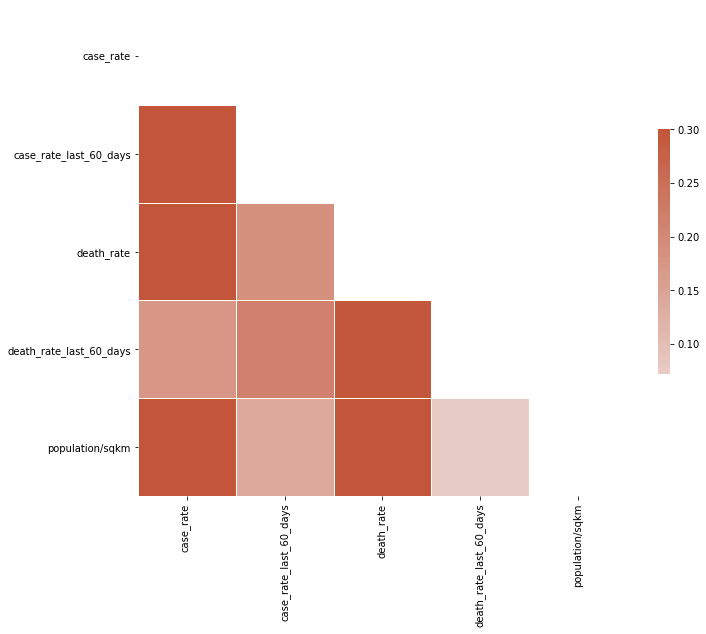

In [13]:
corr = dfPopulation.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap = heatmap.get_figure()

In this case the mobility was not one of the variables because there was not a data source that provided this variables, but even tough the population density also corroborated that the state analyzes is correct mening that where is a high poulation density area there is a high probability of getting infected and dying on it due the high transit.

The variables and the region codes are selected of the dataframe for future storage

In [14]:
dfFinal = dfAll[['cve_ent', 'case_rate', 'case_rate_last_60_days',
       'death_rate', 'death_rate_last_60_days',
       'pct_disability', 'pct_limitation', 'pct_mental_problem',
       'pct_no_problems', 'pct_no_med_insurance','pct_med_insurance',
        'pct_pop_obesity', 'pct_pop_hypertension',
       'pct_pop_diabetes',
       'average_years_finish','average_household_size', 'pct_household_tics','pct_household_no_tics', 
       'population/sqkm']].copy()

The dataframe is stored

In [15]:
dfFinal.to_csv('../data/week3analyzesMunicipalities.csv',index=False)

Data for other variables that were correlated on the state level were not found which presented a limitation to the reaffirmation of the state analyzes but even tough since the available variables did this purpose it is possible to assume that the state analyzes is correct.